# Вариант 1

## Utils

In [399]:
import typing
import functools

import sympy

In [400]:
def vec_norm(vec: sympy.Matrix, p: int = 2) -> float:
    if p == sympy.oo: return sympy.Max(*sympy.Abs(vec))
    res = 0
    for item in vec: res += sympy.Abs(item ** p)
    return sympy.root(res, p)

# Simple tests
test_vec = sympy.Matrix([ 1, 2, -3 ])
assert vec_norm(test_vec, 1) == 6
assert vec_norm(test_vec, 2) == sympy.sqrt(14)
assert vec_norm(test_vec, sympy.oo) == 3

In [401]:
def mat_norm(mat: sympy.Matrix, p: int = 2) -> float:
    match p:
        case 1:
            return max(*[ sum(sympy.Abs(mat).col(i)) for i in range(mat.cols) ])
        case 2:
            gramm = mat.T @ mat
            x = sympy.Symbol('x')
            charpoly = gramm - x * sympy.eye(gramm.shape[0])
            singvals = sympy.solve(charpoly.det())
            max_singval = max(*singvals)
            return sympy.sqrt(max_singval)
        case sympy.oo:
            return max(*[ sum(sympy.Abs(mat).row(i)) for i in range(mat.rows) ])
        case _:
            raise NotImplemented

# Simple tests
test_mat = sympy.Matrix([ [ 1, -2 ], [ 3, -4 ] ])
assert mat_norm(test_mat, 1) == 6
assert mat_norm(test_mat, 2) == sympy.sqrt(15 + sympy.sqrt(221))
assert mat_norm(test_mat, sympy.oo) == 7

In [402]:
def svd(
    A: sympy.Matrix,
    max_singvals: int = 1000000000,
    eq: bool = False
) -> typing.Union[sympy.Equality, typing.Tuple[sympy.Matrix, sympy.Matrix, sympy.Matrix]]:
    eigen = [ ]
    for eigenval, _, eigenvects in (A.T @ A).eigenvects():
        if eigenval == 0: continue
        assert len(eigenvects) == 1
        eigen.append((eigenval, eigenvects[0]))
    eigen.sort(key = lambda tup: tup[0], reverse = True)
    eigen = eigen[:max_singvals]

    U, S, V = sympy.Matrix(), sympy.Matrix(), sympy.Matrix()
    for (eigenval, eigenvect) in eigen:
        singval = sympy.sqrt(eigenval)
        S = sympy.Matrix.hstack(S, sympy.Matrix([ singval ]))
        V = sympy.Matrix.hstack(V, eigenvect / vec_norm(eigenvect))
        u = (A @ eigenvect) / singval
        U = sympy.Matrix.hstack(U, u / vec_norm(u))
    S = sympy.diag(*S)
    
    if not eq: return U, S, V
    return sympy.Eq(A, sympy.MatMul(U, S, sympy.Transpose(V)), evaluate = False)

# Simple test
test_mat = sympy.Matrix([ [ 1, -2 ], [ 3, -4 ] ])
display(svd(test_mat, eq = True))
U, S, V = svd(test_mat)
assert sympy.simplify(U @ S @ V - test_mat) == sympy.zeros(*test_mat.shape)

Eq(Matrix([
[1, -2],
[3, -4]]), Matrix([
[  (-23/14 - sqrt(221)/14)/(sqrt(sqrt(221) + 15)*sqrt((sqrt(221)/14 + 23/14)**2/(sqrt(221) + 15) + (41/14 + 3*sqrt(221)/14)**2/(sqrt(221) + 15))),   (-23/14 + sqrt(221)/14)/(sqrt(15 - sqrt(221))*sqrt((41/14 - 3*sqrt(221)/14)**2/(15 - sqrt(221)) + (23/14 - sqrt(221)/14)**2/(15 - sqrt(221))))],
[(-3*sqrt(221)/14 - 41/14)/(sqrt(sqrt(221) + 15)*sqrt((sqrt(221)/14 + 23/14)**2/(sqrt(221) + 15) + (41/14 + 3*sqrt(221)/14)**2/(sqrt(221) + 15))), (-41/14 + 3*sqrt(221)/14)/(sqrt(15 - sqrt(221))*sqrt((41/14 - 3*sqrt(221)/14)**2/(15 - sqrt(221)) + (23/14 - sqrt(221)/14)**2/(15 - sqrt(221))))]])*Matrix([
[sqrt(sqrt(221) + 15),                    0],
[                   0, sqrt(15 - sqrt(221))]])*Matrix([
[(5/14 - sqrt(221)/14)/sqrt((5/14 - sqrt(221)/14)**2 + 1), (5/14 + sqrt(221)/14)/sqrt(1 + (5/14 + sqrt(221)/14)**2)],
[                    1/sqrt((5/14 - sqrt(221)/14)**2 + 1),                     1/sqrt(1 + (5/14 + sqrt(221)/14)**2)]]).T)

In [403]:
def cond(mat: sympy.Matrix, norm_p: int) ->  float:
    return mat_norm(mat, norm_p) * mat_norm(mat.inv(), norm_p)

# Simple test
test_mat = sympy.Matrix([ [ 1, 0.99 ], [ 1, -1.01 ] ])
assert cond(test_mat, 1) == 2.01

In [404]:
def estimate_error(
    A: sympy.Matrix, dA: sympy.Matrix,
    b: sympy.Matrix, db: sympy.Matrix,
    norm_p: int
) -> float:
    errA = mat_norm(dA, norm_p) / mat_norm(A, norm_p)
    errb = vec_norm(db, norm_p) / vec_norm(b, norm_p)
    xi = cond(A, norm_p)
    return xi * (errb + errA / (1 - xi * errA)).evalf()

## Задача 1

![Alternative Text][1702736708507]

[1702736708507]: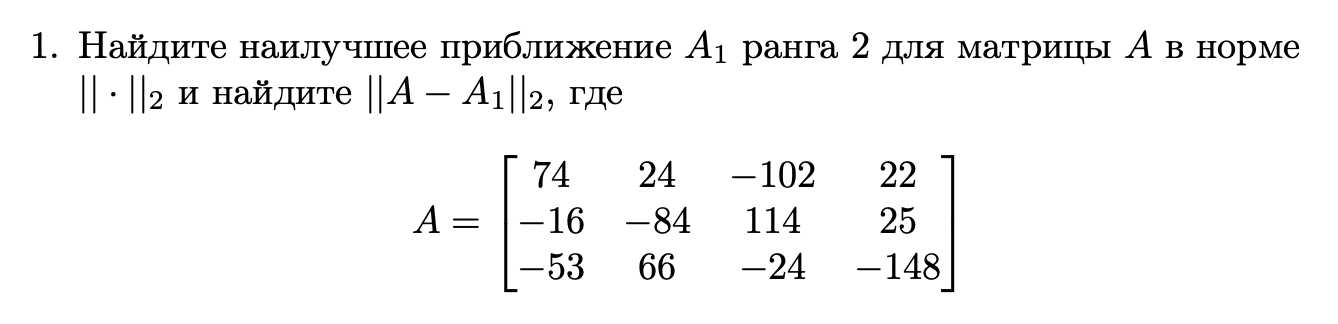

In [405]:
A = sympy.Matrix([
    [ 74, 24, -102, 22 ],
    [ -16, -84, 114, 25 ],
    [ -53, 66, -24, -148 ]
])
display(svd(A, eq = True))
display(svd(A, 2, eq = True))

Eq(Matrix([
[ 74,  24, -102,   22],
[-16, -84,  114,   25],
[-53,  66,  -24, -148]]), Matrix([
[-1/3,  2/3, -2/3],
[ 2/3, -1/3, -2/3],
[-2/3, -2/3, -1/3]])*Matrix([
[198,   0,  0],
[  0, 165,  0],
[  0,   0, 33]])*Matrix([
[    0,  6/11, -7/11],
[-6/11,     0,  6/11],
[ 7/11, -6/11,     0],
[ 6/11,  7/11,  6/11]]).T)

Eq(Matrix([
[ 74,  24, -102,   22],
[-16, -84,  114,   25],
[-53,  66,  -24, -148]]), Matrix([
[-1/3,  2/3],
[ 2/3, -1/3],
[-2/3, -2/3]])*Matrix([
[198,   0],
[  0, 165]])*Matrix([
[    0,  6/11],
[-6/11,     0],
[ 7/11, -6/11],
[ 6/11,  7/11]]).T)

In [406]:
U, S, V = svd(A, 2)
A1 = U @ S @ V.T
display(A1)
print('Rank A1:', A1.rank())
print('Norm |A - A1|:', mat_norm(A - A1, 2))

Matrix([
[ 60,  36, -102,   34],
[-30, -72,  114,   37],
[-60,  72,  -24, -142]])

Rank A1: 2
Norm |A - A1|: 33


## Задача 2

![Alternative Text][1702655809522]

[1702655809522]: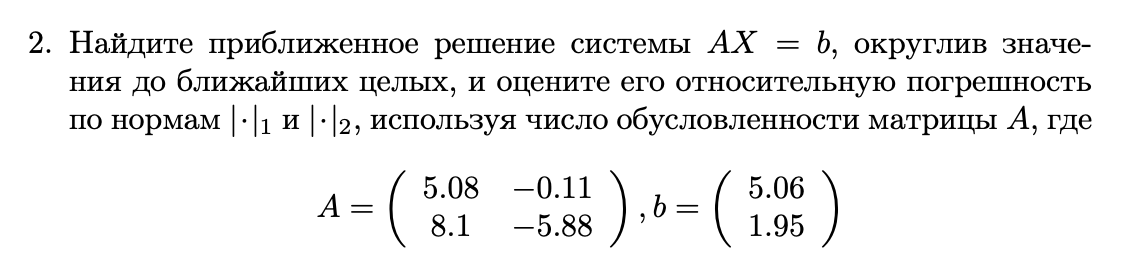

In [408]:
A = sympy.Matrix([ [ 5.08, -0.11 ], [ 8.1, -5.88 ] ])
b = sympy.Matrix([ 5.06, 1.95 ])

rounded_A = sympy.Matrix([ [ 5, 0 ], [ 8, -6 ] ])
rounded_b = sympy.Matrix([ 5, 2 ])

print('Solution:')
display(rounded_A.inv() @ rounded_b)
print("Norm 1:", estimate_error(A, rounded_A - A, b, rounded_b - b, 1))
print("Norm 2:", estimate_error(A, rounded_A - A, b, rounded_b - b, 2))

Solution:


Matrix([
[1],
[1]])

Norm 1: 0.224573861306255
Norm 2: 0.125584825563195


## [TODO] Задача 3

![Alternative Text][1702734929665]

[1702734929665]: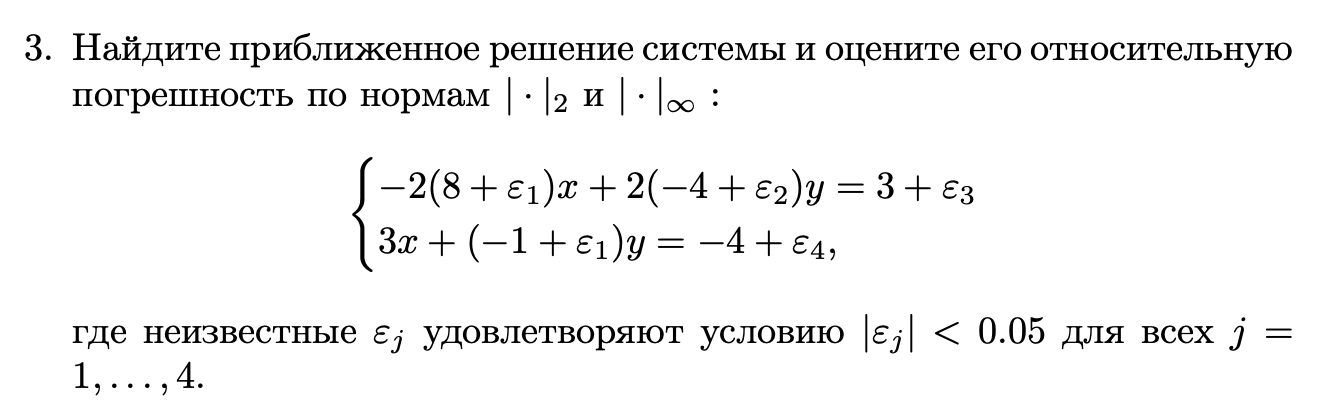

In [ ]:
eps1, eps2, eps3, eps4 = sympy.symbols('epsilon_1 epsilon_2 epsilon_3 epsilon_4')
A = sympy.Matrix([ [ -2 * (8 + eps1), 2 * (-4 + eps2) ], [ 3, (-1 + eps1) ] ])
b = sympy.Matrix([ 3 + eps3, -4 + eps4 ])

rounded_A = A.subs({ eps1: 0, eps2: 0, eps3: 0, eps4: 0 })
rounded_b = b.subs({ eps1: 0, eps2: 0, eps3: 0, eps4: 0 })

print('Solution:')
display(rounded_A.inv() @ rounded_b)
# print("Norm 2:", estimate_error(A, rounded_A - A, b, rounded_b - b, 2))
# print("Norm inf:", estimate_error(A, rounded_A - A, b, rounded_b - b, sympy.oo))

## [TODO] Задача 4

![Alternative Text][1702736280728]

[1702736280728]: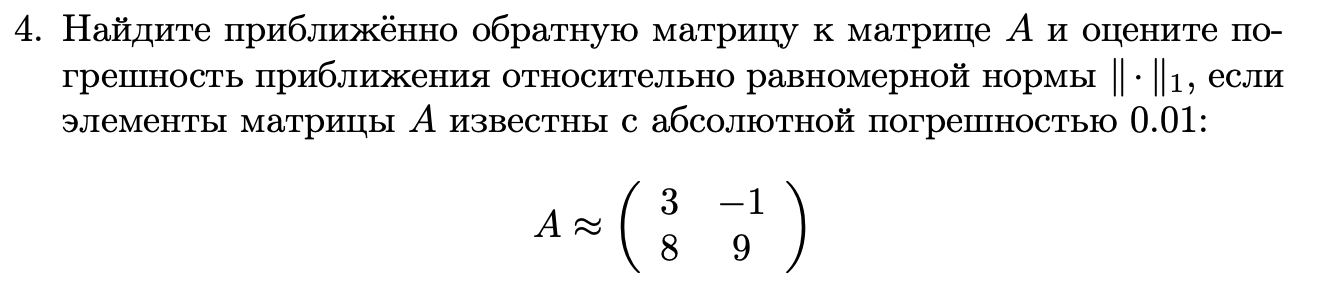

In [434]:
A = sympy.Matrix([ [ 3, -1 ], [ 8, 9 ] ])
A.inv()

Matrix([
[ 9/35, 1/35],
[-8/35, 3/35]])

## [TODO] Задача 5

![Alternative Text][1702736681810]

[1702736681810]: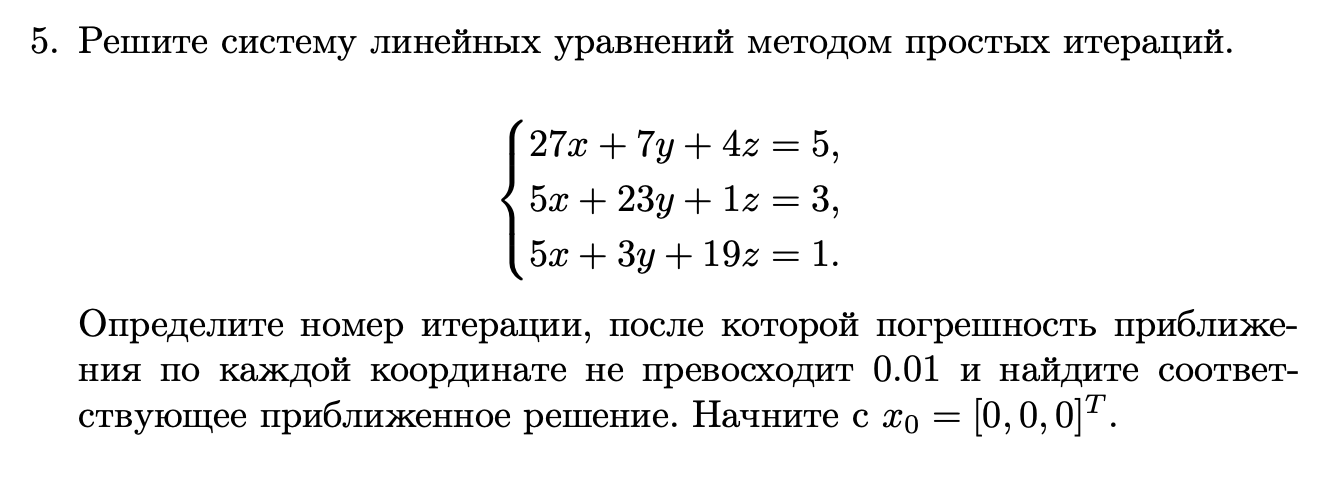

## [TODO] Задача 6

![Alternative Text][1702736754154]

[1702736754154]: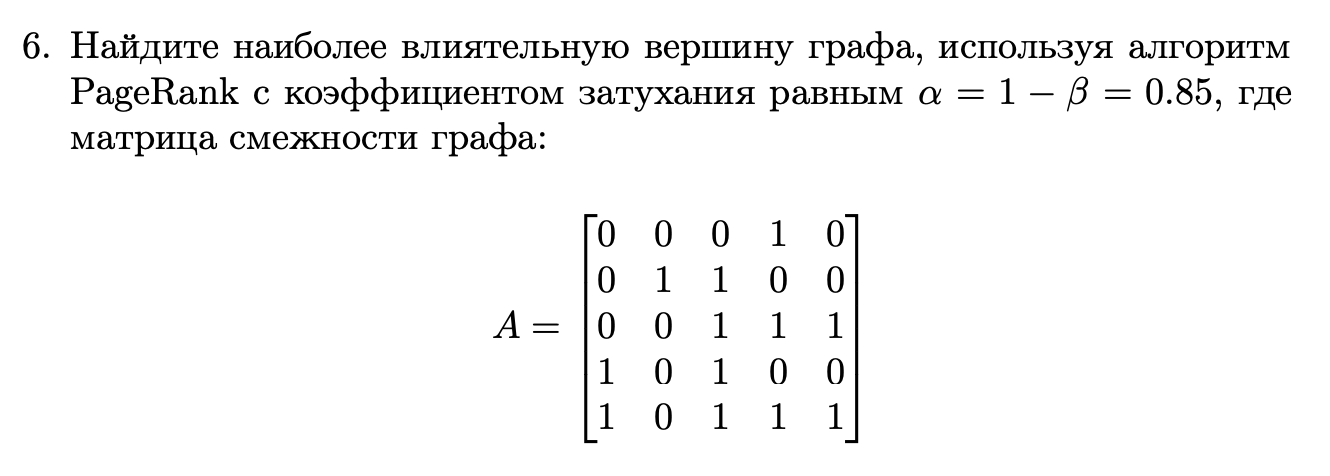

## [TODO] Задача 7

![Alternative Text][1702736766349]

[1702736766349]: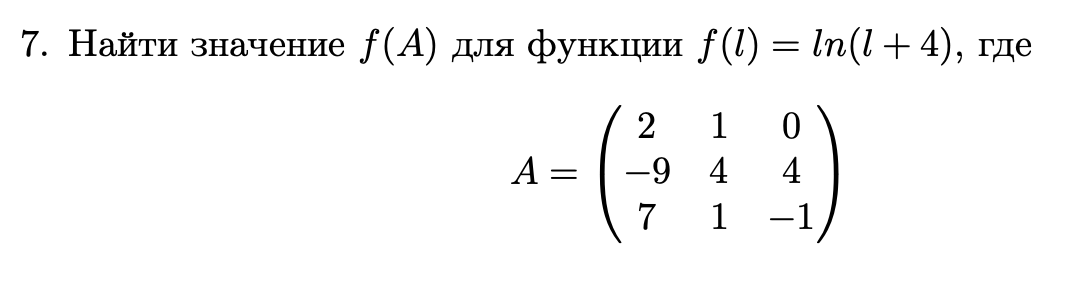